In [2]:
pip install kagglehub


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd

# Load directly from your location
file_path = r"D:\Documents\ML 100 days\Proj-4\spam.csv"

df = pd.read_csv(file_path, encoding="latin-1")

# Keep only the necessary columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

print(df.head())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


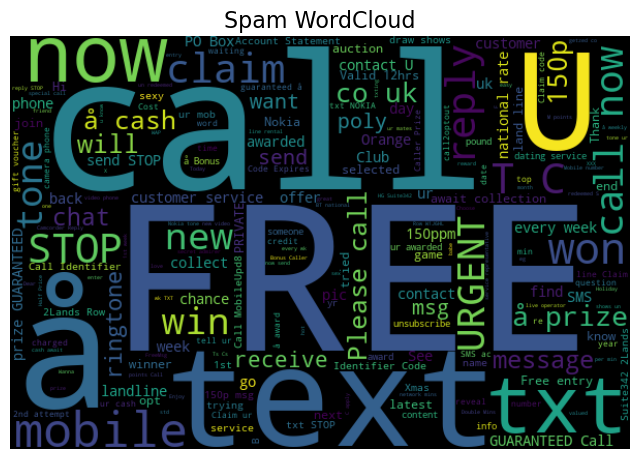

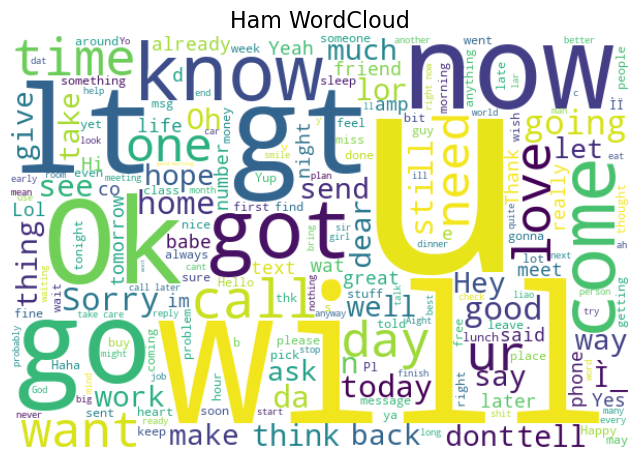

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Separate spam and ham messages
spam_messages = df[df['label'] == 'spam']['message']
ham_messages = df[df['label'] == 'ham']['message']

# Spam WordCloud
spam_wc = WordCloud(width=600, height=400, background_color="black").generate(" ".join(spam_messages))
plt.figure(figsize=(8,6))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Spam WordCloud", fontsize=16)
plt.show()

# Ham WordCloud
ham_wc = WordCloud(width=600, height=400, background_color="white").generate(" ".join(ham_messages))
plt.figure(figsize=(8,6))
plt.imshow(ham_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Ham WordCloud", fontsize=16)
plt.show()


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Features (X) and Labels (y)
X = df['message']
y = df['label'].map({'ham': 0, 'spam': 1})  # ham=0, spam=1

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("Shape of TF-IDF matrix:", X_train_tfidf.shape)


Shape of TF-IDF matrix: (4457, 7472)


In [9]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9668161434977578
Confusion Matrix:
 [[965   0]
 [ 37 113]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [11]:
# Try with your own messages
test_messages = [
    "Congratulations! You won a free ticket to Bahamas. Claim now!",
    "Hi John, are we still meeting for lunch tomorrow?"
]

test_tfidf = vectorizer.transform(test_messages)
pred = model.predict(test_tfidf)

for msg, label in zip(test_messages, pred):
    print(f"Message: {msg}\nPrediction: {'Spam' if label == 1 else 'Ham'}\n")


Message: Congratulations! You won a free ticket to Bahamas. Claim now!
Prediction: Spam

Message: Hi John, are we still meeting for lunch tomorrow?
Prediction: Ham

